**Mall Customers Clustering Analysis**

**Installing the Libraries**

In [2]:
!pip install dabl

In [3]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [4]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Examining Data

In [5]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [6]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
75,76,Male,26,54,54
48,49,Female,29,40,42
103,104,Male,26,62,55


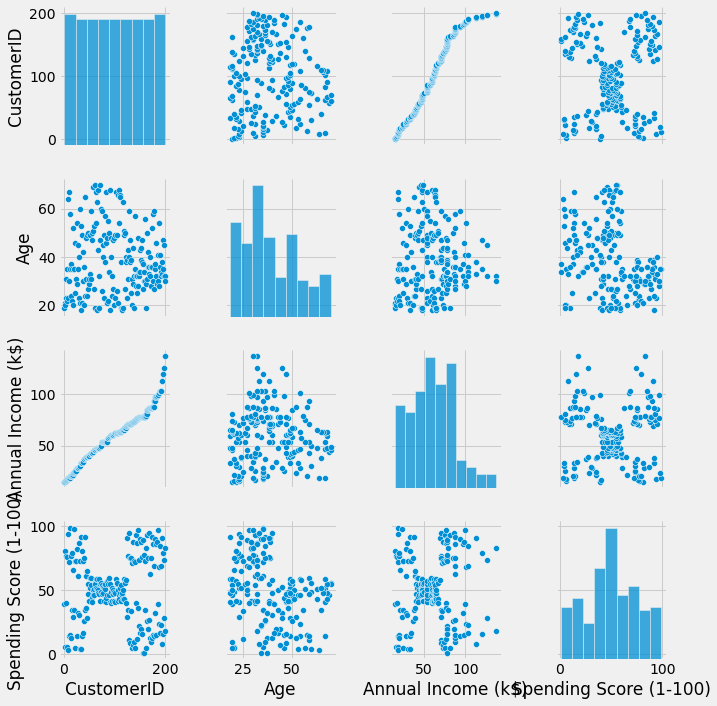

In [9]:
# lets get the pairplot for the data
sns.pairplot(data)
plt.show()

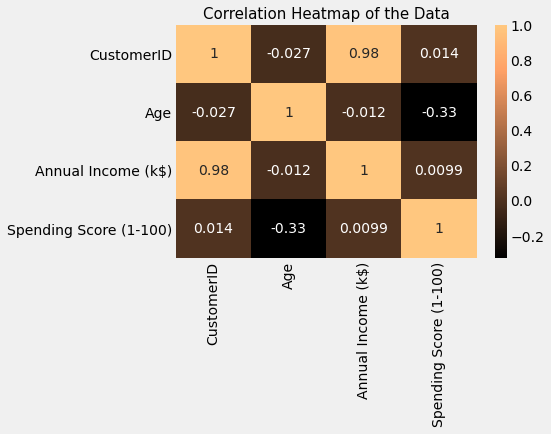

In [11]:
# lets check the Correlation Heat Map of the Data

sns.heatmap(data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

## Observations: very less correlation among variables. But Age is negativly correlated to Spending score

> The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.
>> We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

Target looks like regression


W:\Softwares\Anaconda\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=5.61E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

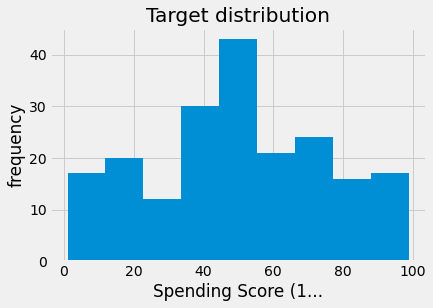

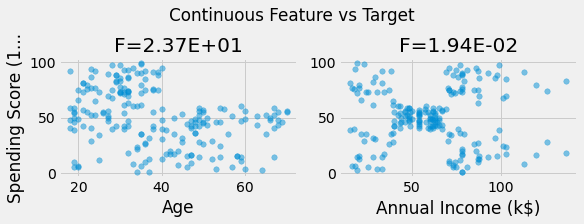

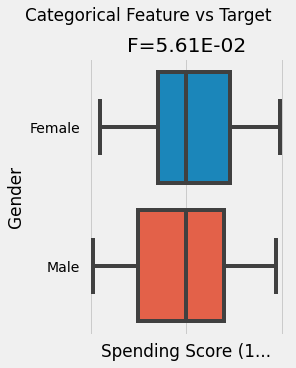

In [12]:
# lets analyze the data with respect to Spending Score
# dabl - data analysis baseline library
dabl.plot(data, target_col = 'Spending Score (1-100)')

# Observation: 
    ## we can see score between 50-60 has the highest frequency.
    ## Females tends to have a higher spending score than males. But for males, the IQR is wide
    ## Spending score is higher for age group 20-40, close 100. comparatively age 40-60 has got lower spending score
    ## the graph between spending score and annual income shows that people with annual income between 45-55 K$ tends to have spending score between 45-55.


Target looks like regression


W:\Softwares\Anaconda\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

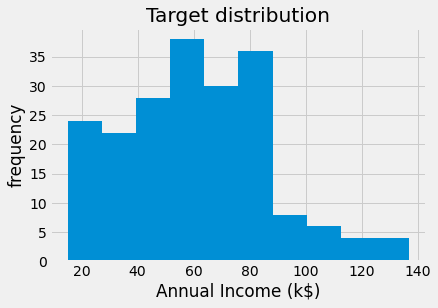

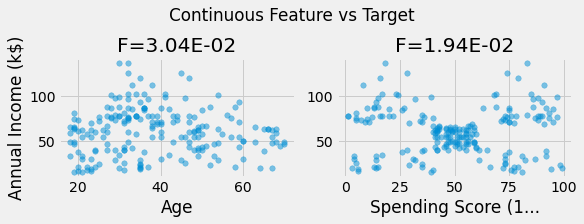

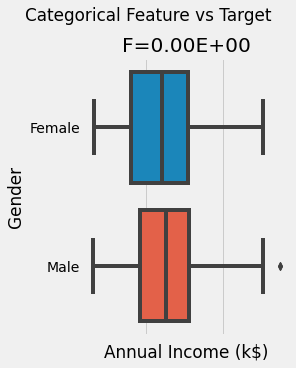

In [13]:
# lets analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

## Observations:
    ## most people have annual income in range 40-80 K$ 
    ## there is hardly any correlation between age and annual income
    ## annual income of female seems a bit wide spread, but the median of male/female is almost similar

## Descriptive Statistics

In [14]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [16]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Data Visualization

#### Univariable Analysis

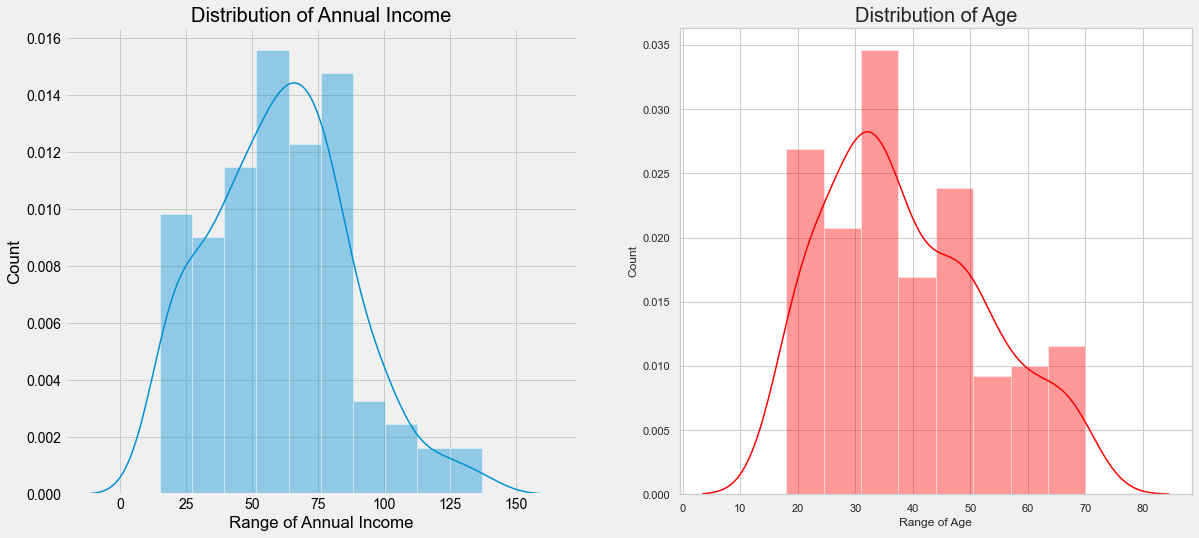

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

## subplot is used to plot more than 1 plot 
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)']) # distribution plot for univariate analysis
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100 US Dollars.
>> Most of the people have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Taking inferences about the Customers.
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in umber as compared to the Middle aged people.


In [19]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

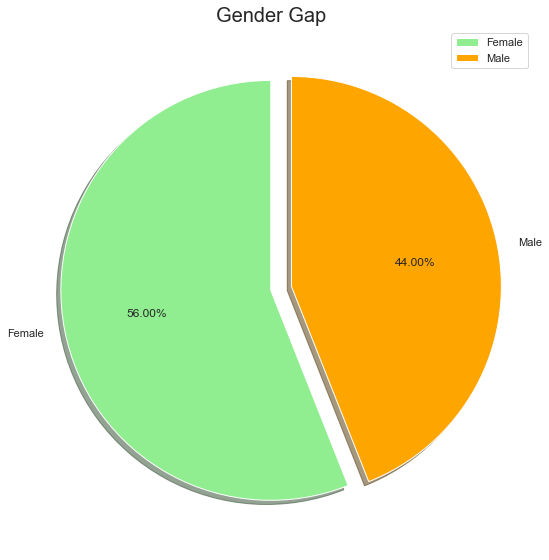

In [18]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender in the Mall
>> Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

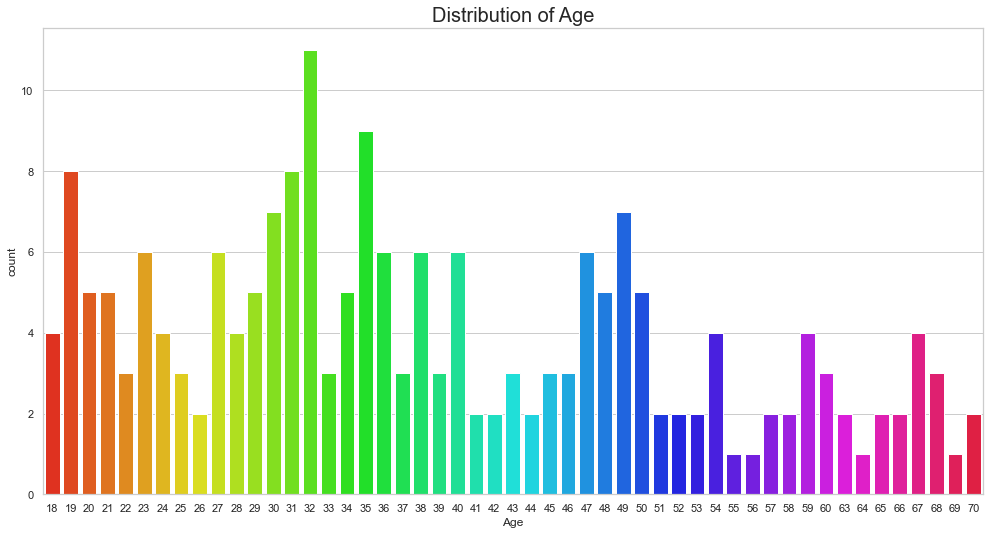

In [20]:
## Age distribution of customers visiting the mall
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

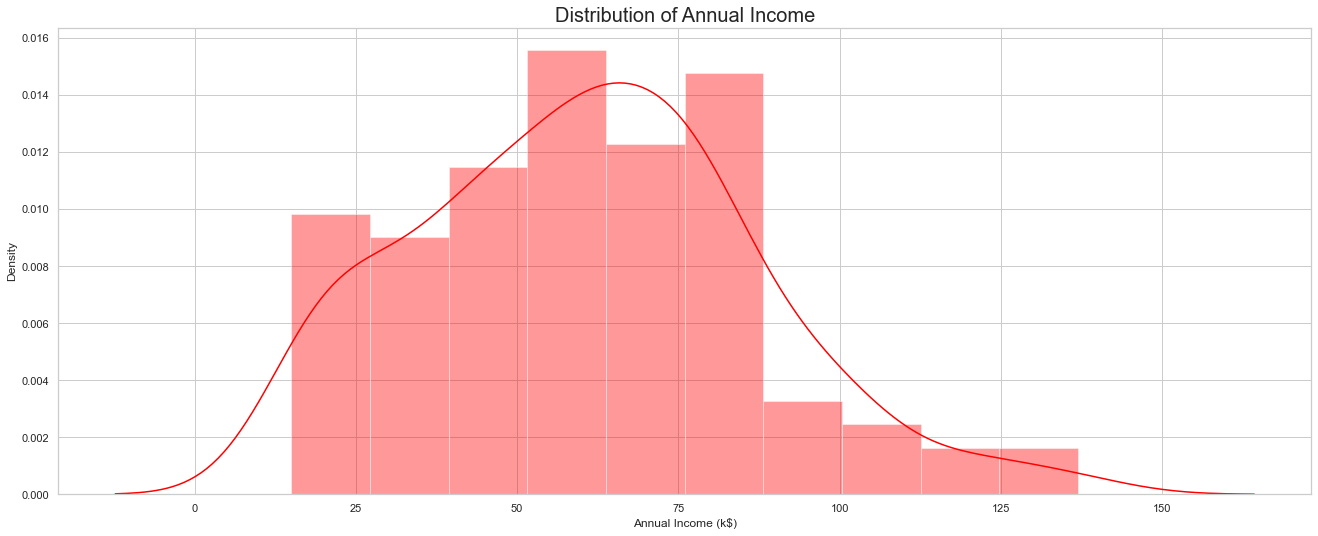

In [22]:
# lets check the distribution of Annual Income

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars.
> There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78 US Dollars.

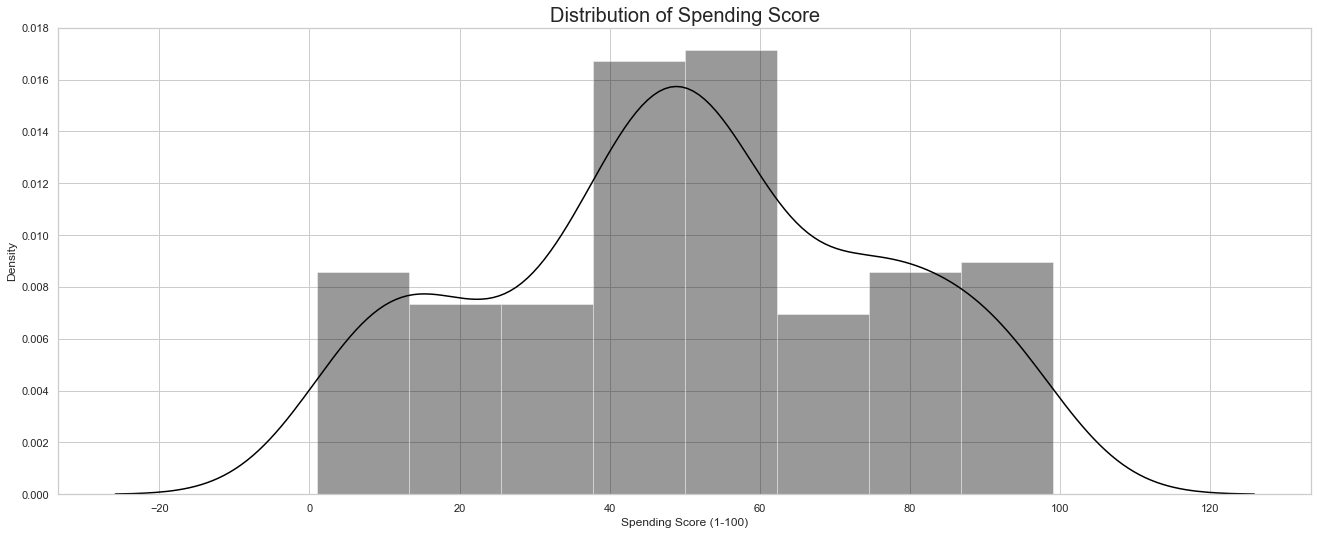

In [23]:
# lets check the distribution of Spending Score

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

#### Bi-Variate Analysis

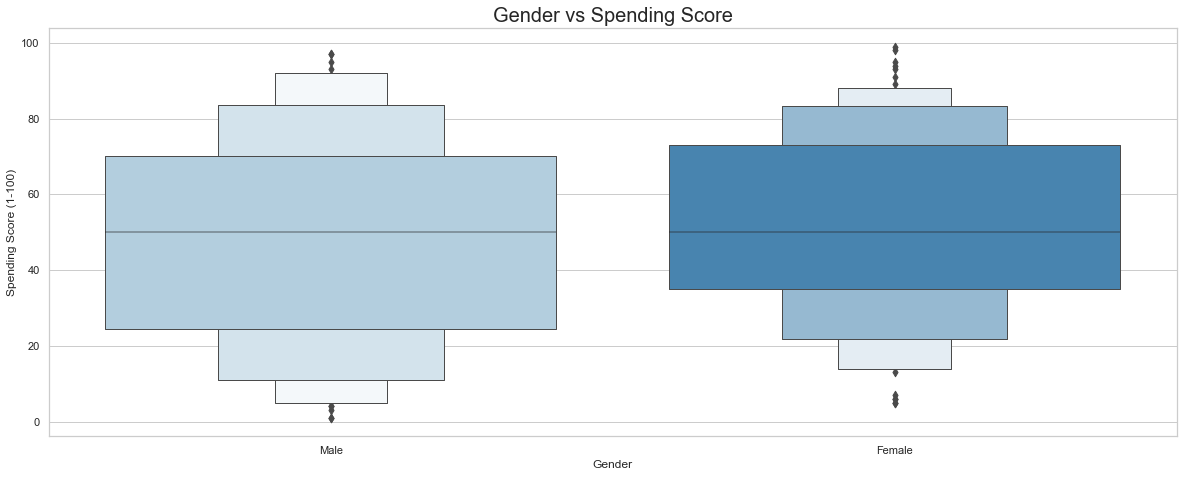

In [24]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which again points to the fact that women are Shopping Leaders.

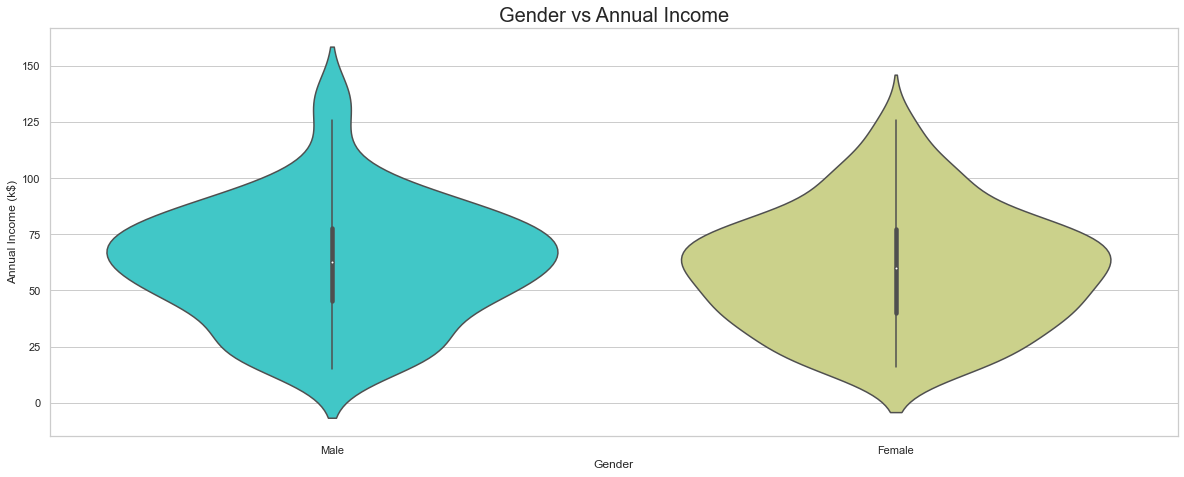

In [57]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

> Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.
>> There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income. 

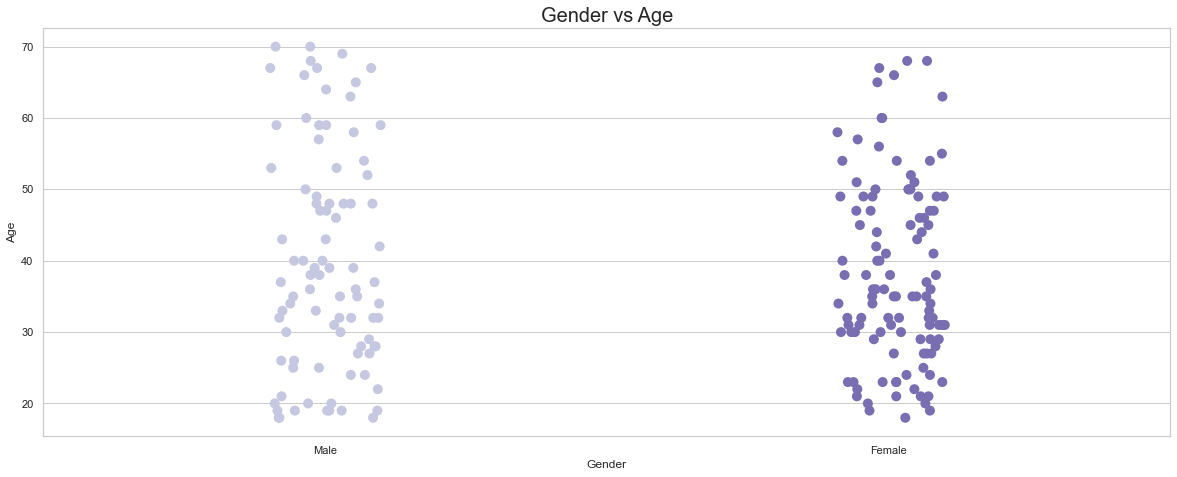

In [25]:
# Gender vs Age
# strippplot is a scatter plot with one variable categorical
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

## Observations:
    ## Females visiting the mall has higher age density as compared to males visiting the mall

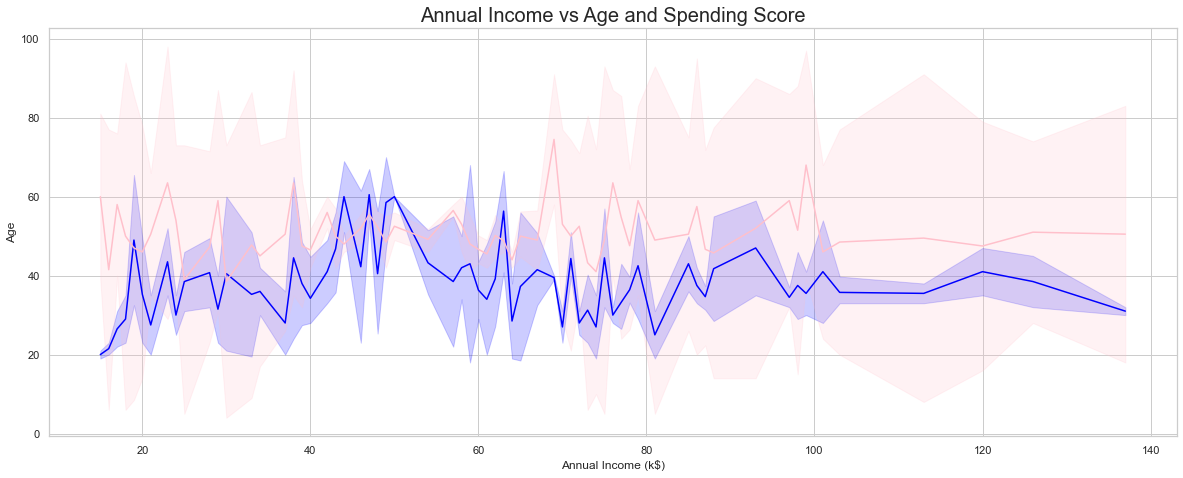

In [26]:
# Annual Income vs Age and Spending Score

x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue') # annual income vs age
sns.lineplot(x, z, color = 'pink') # annual income vs spending score
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Varies with Annual Income.

## Clustering Analysis

In [27]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [28]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

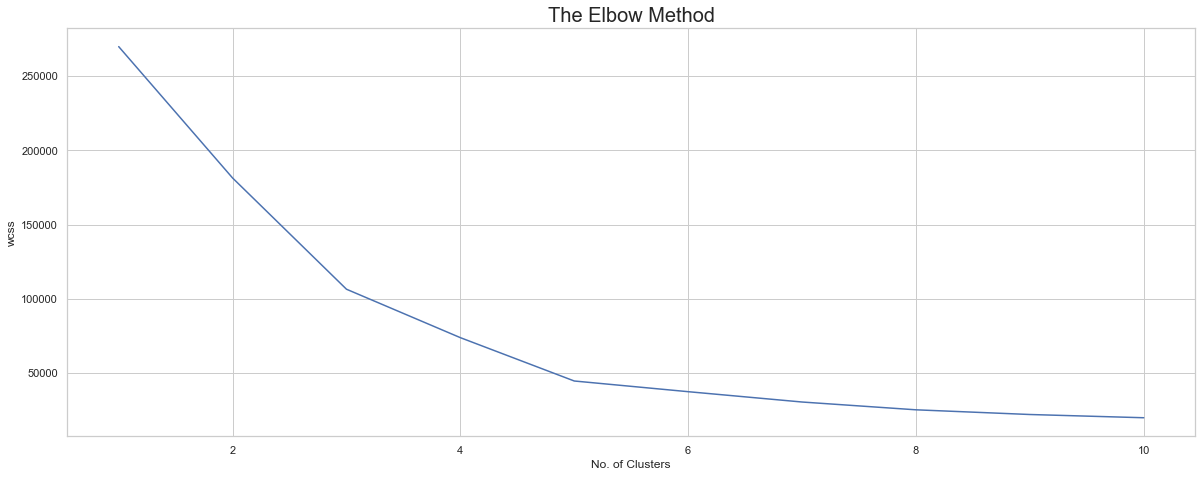

In [62]:
from sklearn.cluster import KMeans

wcss = [] # within cluster sum of squares

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

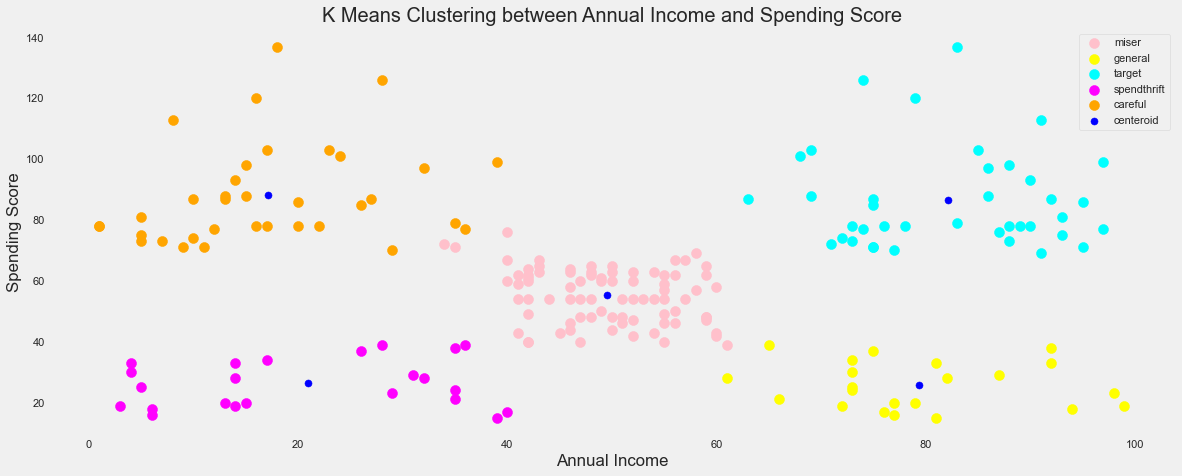

In [63]:
# lets visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

### Clustering between Age and Spending Score

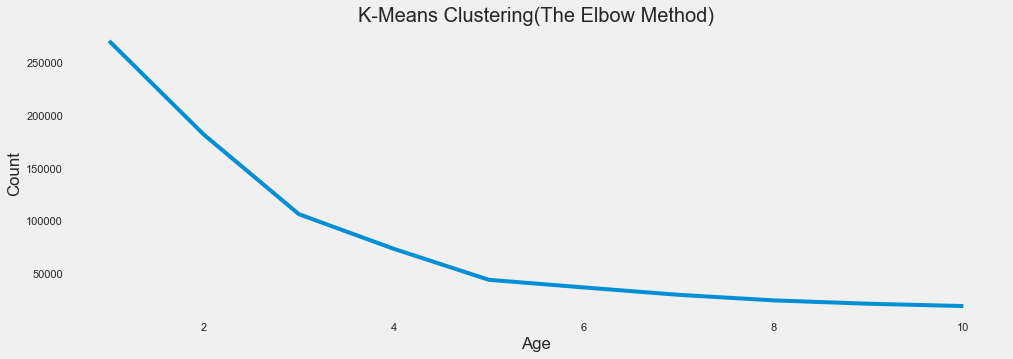

In [64]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

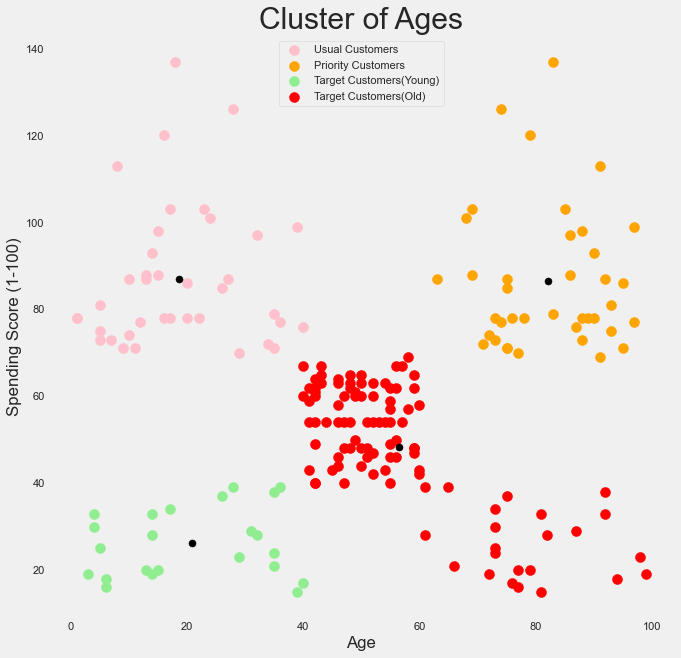

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

>According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to  optimize the spending scores of the customer in the Mall.